# Assignment 4
# Ensemble Learning: Random Forests and Adaboost

## Deadline: Monday, November 20 at 11:59 PM
## The assignment must be submitted in the form of a Jupyter notebook and uploaded to eClass.

In this assignment, you will use the Gestational Age dataset that you have already worked on during in-class exercises and in Assignment 3. You will explore ensemble learning through two applications: Random Forests and boosting with Adaboost.

## Marks:
<ul type="none">
  <li><b>Exercise 1: 4 marks</b></li>
    <ul>
      <li>Implement the training and testing of a DecisionTreeRegressor: 1 mark;</li>
      <li>Implement the training and testing of the RandomForestRegressor: 1 mark;</li>
      <li>Return and plot feature importances: 0.5 marks;</li>
      <li>Compare and discuss the performance of the two implemented regressors (max 200 words): 1.5 marks.</li>
    </ul>
  <li><b>Exercise 2: 3 marks</b></li>
    <ul>
      <li>Create a dictionary called param_dist which specifies parameters for max_depth, max_features and n_estimators: 1 mark;</li>
      <li>Create an instance (grid) of GridSearchCV with RandomForestRegressor() as the model and param_dist as the search grid (with cross validation: cv=5); then run on the training data: 1 mark;</li>
      <li>Apply the tuned parameters to the model and get a new test prediction: 0.5 marks;</li>
      <li>Compare the performance with the previously implemented Random Forest regressor: 0.5 marks.</li>
    </ul>
  <li><b>Exercise 3: 3 marks</b></li>
    <ul>
      <li>Try Adaboost Regression using default parameters: 1 mark;</li>
      <li>Try optimising parameters (such as min_samples_leaf and n_estimators) using GridSearchCV: 1 mark;</li>
      <li>Apply the optimised parameters to train and test a new model: 1 mark.</li>
    </ul>   



First load all needed modules and download the dataset.

In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# This code will download the required data files from GitHub
import requests
def download_data(source, dest):
    base_url = 'https://raw.githubusercontent.com/'
    owner = 'SirTurtle'
    repo = 'ML-BME-UofA-data'
    branch = 'main'
    url = '{}/{}/{}/{}/{}'.format(base_url, owner, repo, branch, source)
    r = requests.get(url)
    f = open(dest, 'wb')
    f.write(r.content)
    f.close()

# Create the temp directory, if it doesn't already exist
import os
if not os.path.exists('temp'):
   os.makedirs('temp')

download_data('Week-6-Feature-extraction-and-selection/data/GA-structure-volumes-preterm.csv', 'temp/GA-structure-volumes-preterm.csv')

### Exercise 1: Training Random Forests to Predict Gestational Age from Regional Brain Volumes

Apply Scikit-Learn's Random Forest Regressor to the task of predicting gestational age (GA) from regional brain volumes. Complete the code below to:

   1. Implement the training and testing of the ```DecisionTreeRegressor()```
   2. Implement the training and testing of the  ```RandomForestRegressor()```
   3. Return and plot feature importances (see the [scikit-learn tutorial](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) for guidance)
   4. Compare and discuss the performance of the two implemented regressors
   
Data pre-processing has been performed for you

Decision Tree Score 0.7872742274443362
Random Forest initial Score 0.910875895609417
Feature ranking:
1. feature 29 (0.202537)
2. feature 85 (0.134310)
3. feature 28 (0.122371)
4. feature 17 (0.080268)
5. feature 35 (0.051614)
6. feature 11 (0.046644)
7. feature 37 (0.040346)
8. feature 23 (0.034194)
9. feature 38 (0.029000)
10. feature 34 (0.021605)
11. feature 27 (0.021435)
12. feature 16 (0.021350)
13. feature 21 (0.020629)
14. feature 36 (0.018081)
15. feature 33 (0.016214)
16. feature 84 (0.015195)
17. feature 46 (0.011310)
18. feature 22 (0.011049)
19. feature 10 (0.008937)
20. feature 13 (0.008394)
21. feature 30 (0.007769)
22. feature 6 (0.007124)
23. feature 45 (0.006736)
24. feature 18 (0.004053)
25. feature 15 (0.004008)
26. feature 82 (0.003533)
27. feature 26 (0.003104)
28. feature 12 (0.002727)
29. feature 14 (0.002648)
30. feature 19 (0.002444)
31. feature 55 (0.002395)
32. feature 60 (0.002373)
33. feature 68 (0.002334)
34. feature 7 (0.001851)
35. feature 5 (0.001651)


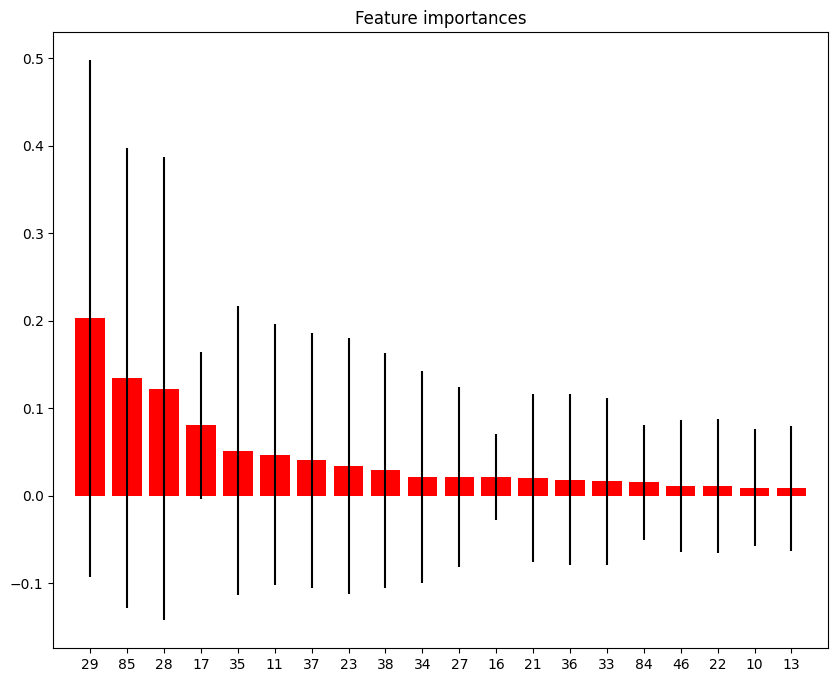

In [3]:
# Load data
DATAMAT = pd.read_csv('temp/GA-structure-volumes-preterm.csv', header=None)

# Separate out data from labals
DATA = DATAMAT.loc[:,1:] # volumes - we have 86 features and 164 samples
LABELS = DATAMAT[0] # GA - 164

# Split data into test and train
X_train_GA, X_test_GA, y_train_GA, y_test_GA = train_test_split(DATA, LABELS, test_size=.4, random_state=42)

# 1.1 Get baseline prediction from decision tree (no param optimisation)

# 1.1.1 Create instance of DecisionTreeRegressor with default parameters
tree_model = DecisionTreeRegressor()

# 1.1.2 Train
tree_model.fit(X_train_GA, y_train_GA)

# 1.1.3 Test
score_DT = tree_model.score(X_test_GA, y_test_GA)
print('Decision Tree Score', score_DT)

# 1.2 Get baseline prediction from Random Forest (no param optimisation)

# 1.2.1 Create instance of RandomForestRegressor with default parameters. Use 100 trees (n_estimators=100)
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 1.2.2 Train
forest_model.fit(X_train_GA, y_train_GA)

# 1.2.3 Test
score_RF1 = forest_model.score(X_test_GA, y_test_GA)
print('Random Forest initial Score', score_RF1)

# 1.3. Get feature importances
importances = forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(X_train_GA.shape[1]):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the 20 most important features in the forest
plt.figure(figsize=(10,8))
plt.title('Feature importances')
plt.bar(range(20), importances[indices][0:20], color='r', yerr=std[indices][0:20], align='center')
plt.xticks(range(20), indices[0:20])
plt.xlim([-1, 20])
plt.show()

1.4 Compare and discuss the performance of the two implemented regressors.

*Add your discussion here:*

The Scikit-learn module allows for tuning of several key parameters of the model. Of these, perhaps the most important are:

- Number of features
- Max depth of trees
- Number of estimators

We will now use Scikit-Learn's ```GridSearchCV``` function to optimise the parameters of our Random Forest and improve performance on the above problem.

For help on how to implement parameter optimisation using GridSearch, look at the scikit learn [documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py).

### Exercise 2:  Perform Parameter Optimisation for Random Forests using ```GridSearchCV```

Implement parameter optimisation using ```GridSearchCV```:
   1. Create a ```dict``` called ```param_dist``` which specifies parameters for ```max_depth```, ```max_features``` and ```n_estimators ```
   2. Create an instance (```grid```) of  ```GridSearchCV``` with ```RandomForestRegressor()``` as the model and ```param_dist``` as the search grid (with cross validation: ```cv=5```); then run on the training data
   3. Apply the tuned parameters to the model and get a new test prediction
   4. Compare the performance with the previously implemented Random Forest regressor
  

In [4]:
# 2.1 Specify parameters and distributions to sample from in the form of a dict
# Hint: try selecting 5 values in the range [3; 50] for max_depth and 4 values in the range [10; 100] for n_estimators
param_dist = {"max_depth": [3, 15, 25, 40, 50],
              "max_features": np.linspace(10, DATA.shape[1], 5).astype(int),
              "n_estimators": [10, 40, 70, 100]}

model = RandomForestRegressor(random_state=42)

# 2.2 Create an instance of GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_dist, cv=5)

# 2.2.1 Run gridsearch on the training data
grid.fit(X_train_GA, y_train_GA)

# Summarize the results of the grid search
print('Best classification score achieved using grid search:', grid.best_score_)
print('The parameters resulting in the best score are depth: {}, max_f: {}, and n_estimators: {} '\
      .format(grid.best_estimator_.max_depth,
              grid.best_estimator_.max_features,\
              grid.best_estimator_.n_estimators))
print(grid.best_params_)

# 2.3 Apply the tuned parameters to the model and get a new test prediction

# 2.3.1 Create RF model using optimised parameters
model = RandomForestRegressor(max_depth=grid.best_estimator_.max_depth,
                              max_features=grid.best_estimator_.max_features,
                              n_estimators=grid.best_estimator_.n_estimators,
                              random_state=42)

# 2.3.2 fit model to training data
model.fit(X_train_GA, y_train_GA)

# 2.3.3 Test
score_RF2 = model.score(X_test_GA, y_test_GA)
print('Random Forest refined test Score', score_RF2)

Best classification score achieved using grid search: 0.9187755869300558
The parameters resulting in the best score are depth: 15, max_f: 86, and n_estimators: 40 
{'max_depth': 15, 'max_features': 86, 'n_estimators': 40}
Random Forest refined test Score 0.9116850711202801


2.4 Compare the performance with the previously implemented Random Forest regressor.

*Add your discussion here:*


### Exercise 3: Training Adaboost to Predict Gestational Age from Regional Brain Volumes

Apply Scikit-Learn's Adaboost regressor to the task of predicting gestational age (GA) from regional brain volumes.

Using the test training data split from above (```X_train_GA, X_test_GA, y_train_GA, y_test_GA```) complete the code below to:
   1.  Trial Adaboost Regression using default parameters
   2.  Try optimising parameters (such as min_samples_leaf and n_estimators) using GridSearchCV. Note, the entry for min_samples_leaf in the parameter dict has been completed for you to demonstrate how to tune the parameters of a base learner (in this case a decision tree)
   3.  Apply the optimised parameters to train and test a new model.

In [5]:
# 3 Get baseline prediction from Adaboost (no param optimisation)

# 3.1 Create instance of Adaboost with default parameters
clf = AdaBoostRegressor(random_state=42)

# 3.1.1 Train on data X_train_GA, y_train_GA
clf.fit(X_train_GA, y_train_GA)

# 3.1.2 Test
score_AB1 = clf.score(X_test_GA, y_test_GA)
print('Adaboost initial Score', score_AB1)

# 3.2 Optimise parameters using GridSearchCV

# 3.2.1 Specify parameters and distributions to sample from in the form of a dict
param_dist = {"estimator__min_samples_leaf": [1, 2, 3, 5, 10],
              "estimator__max_depth": [3, 15, 25, 40, 50],
              "n_estimators": [10, 40, 70, 100]}
model = AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42))

# 3.2.2 Create an instance of GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error')  # Hint: use scoring='neg_mean_squared_error'

# 3.2.3 Run gridsearch on the training data
grid.fit(X_train_GA, y_train_GA)
print('Best regression score achieved using grid search:', grid.best_score_)
print('The parameters resulting in the best score are min samples per leaf: {}, and n_estimators {} '.format(
    grid.best_estimator_.estimator_.min_samples_leaf,grid.best_estimator_.n_estimators))

# 3.3 create RF model using optimised parameters
model = AdaBoostRegressor(estimator=DecisionTreeRegressor(
                                min_samples_leaf=grid.best_estimator_.estimator_.min_samples_leaf,
                                random_state=42),
                          n_estimators=grid.best_estimator_.n_estimators)

# 3.3.1 Fit model to training data
model.fit(X_train_GA, y_train_GA)

# 3.3.2 Test
score_AB2 = model.score(X_test_GA, y_test_GA)
print('Adaboost refined test Score', score_AB2)

Adaboost initial Score 0.9055990872670802
Best regression score achieved using grid search: -1.4070296084057834
The parameters resulting in the best score are min samples per leaf: 3, and n_estimators 40 
Adaboost refined test Score 0.9064099770601408
